# Disk Space

---

In [9]:
from oak_cli.evaluation.addons.flops.utils.imports import *

In [10]:
prepare_notebook()

In [11]:
df, normalized_df, singular_run_df, trained_model_df = load_and_prepare_data()

---

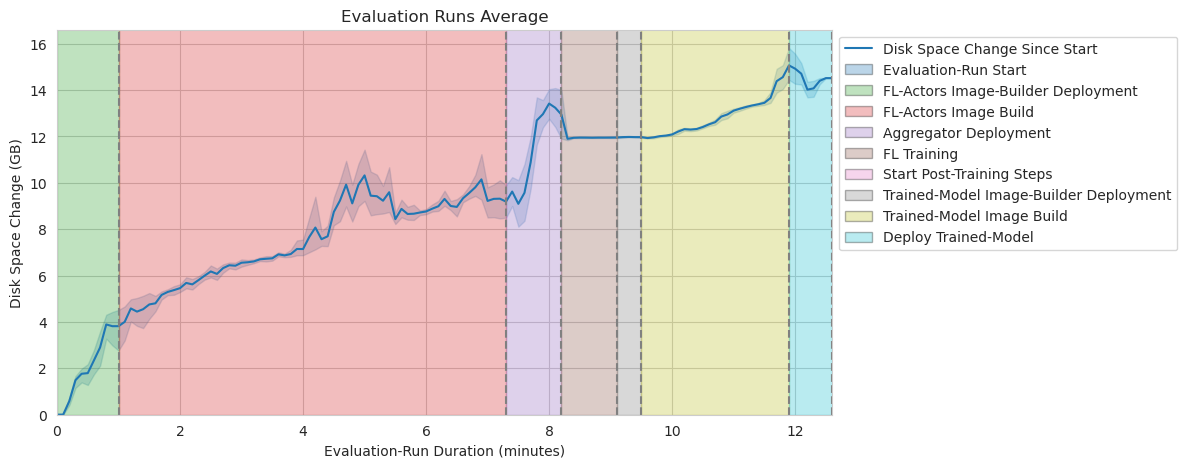

In [12]:
draw_disk_space_linegraph(normalized_df)

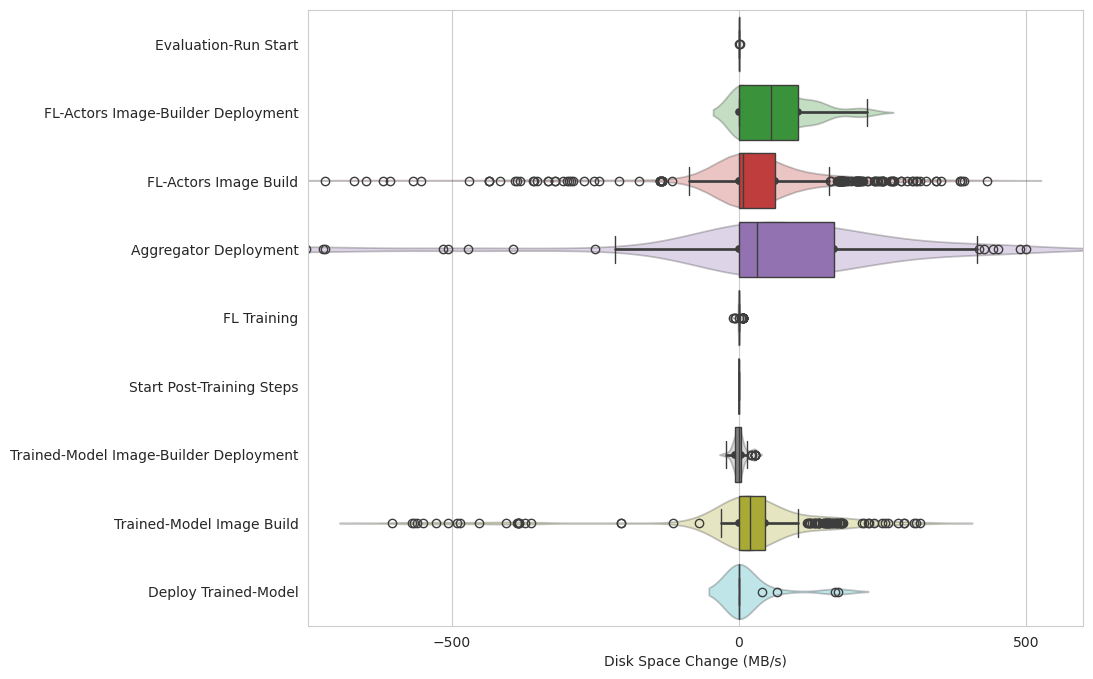

In [13]:
draw_box_violin_plot_for_each_stage_for_disk_space(df)

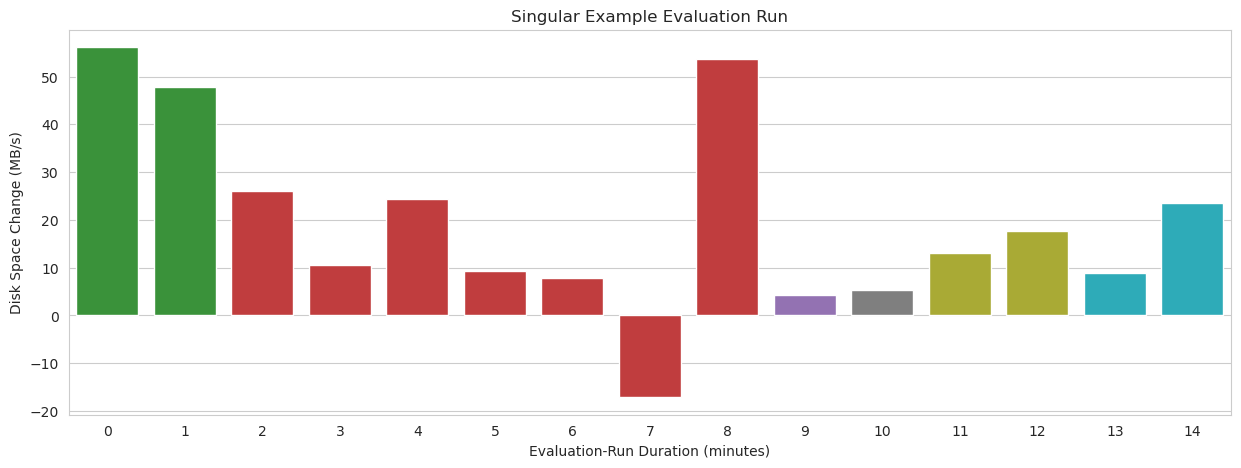

In [14]:
draw_mb_per_second_graph(
    data=df,
    use_bar_plot=True,
    show_confidence_interval=False,
    key=DISK_LAST_KEY,
    y_label="Disk Space Change (MB/s)",
)

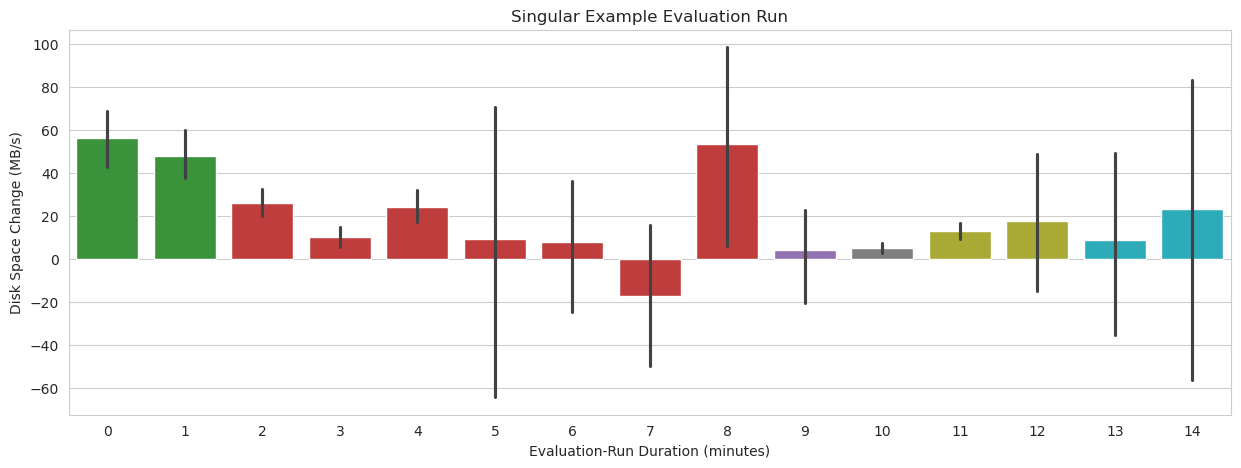

In [15]:
draw_mb_per_second_graph(
    data=df,
    use_bar_plot=True,
    key=DISK_LAST_KEY,
    y_label="Disk Space Change (MB/s)",
)

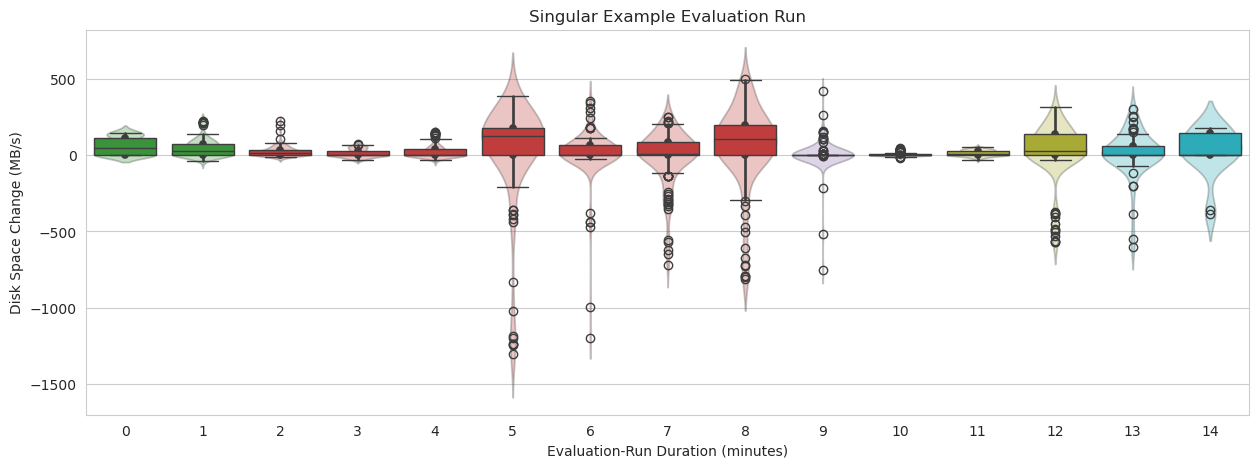

In [16]:
draw_mb_per_second_graph(
    data=df,
    key=DISK_LAST_KEY,
    y_label="Disk Space Change (MB/s)",
)